In [1]:
from model import *
from utils import *

import torch
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torch.utils.tensorboard import SummaryWriter

from torchvision import transforms
from utils import *
from model import *
import os
from matplotlib import pyplot as plt

In [2]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:

'''
'''
def load_model():


    net = TwinNetwork().to(device)

    checkpoint_dir = os.path.join( 'checkpoint' , 'siemese_network_v3' )

    model_state = None

    dirs = os.listdir( checkpoint_dir )

    if len(dirs) > 0:

        latest_checkpoint = max(dirs)

        checkpoint = torch.load( os.path.join( checkpoint_dir , latest_checkpoint ) )

        model_state = checkpoint['model_state_dict']
        # opt_state = checkpoint['optimizer_state_dict']
        last_epoch = checkpoint['epoch']
        loss = checkpoint['loss']

        print(' [*] Model Restored from {} Epoch \n'.format(last_epoch) )

    if model_state:
        net.load_state_dict(model_state)

    net.eval()

    return net


In [4]:
'''
'''
def confidence_score( net , x0 , x1 ):

    x0 , x1 = transforms.ToTensor()(x0).unsqueeze(0) , transforms.ToTensor()(x1).unsqueeze(0)

    # print( 'after : ' , x0.shape , x1.shape )

    # concat = torch.cat((x0,x1),0)

    output1,output2 = net( x0.to(device) , x1.to(device) )

    eucledian_distance = F.pairwise_distance(output1, output2)

    return eucledian_distance


In [5]:

def show_image( x0 , x1 ):

    fig = plt.figure()

    ax = plt.subplot( 1 , 2 , 1 )
    plt.tight_layout()
    ax.set_title( 'Source' )
    ax.axis('off')
    plt.imshow( x0 )

    ax = plt.subplot( 1 , 2 , 2 )
    plt.tight_layout()
    ax.set_title( 'Destination' )
    ax.axis('off')
    plt.imshow( x1 )

    plt.show()


In [7]:
net = load_model()
net

 [*] Model Restored from 39 Epoch 



TwinNetwork(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(1, 1), padding=(1, 1))
    (1): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (5): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout2d(p=0.3, inplace=False)
    (9): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout2d(p=0.5, inplace=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=43264, out_features=1024

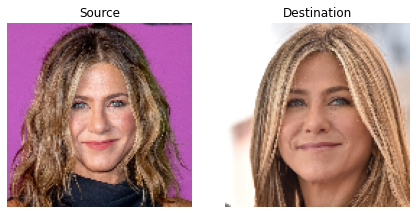

In [8]:

test_obj = {
'src' :  'tests/jennifer-aniston.jpg',
'dest' : 'tests/jennifer-aniston-1.jpg'
}

input0, input1 = auto_crop( test_obj['src'] ) , auto_crop( test_obj['dest'] )

show_image( input0 , input1 )


In [9]:

eucledian_distance = confidence_score( net , input0 , input1 )

print( 'confidence score : ' , eucledian_distance.item() )


confidence score :  1.1313708455418237e-05
